# PHY205: General Physics for the Life Sciences I

## Tucker Knaak - Department of Physics, Creighton University - Spring 2023

### Lab 4: Microstates, Macrostates, and Distributions of Energy

#### In this lab, students are expected to:
##### 1. Distinguish between microstates and macrostates in simple systems
##### 2. Calculate entropy from an accounting of microstates
##### 3. Understand why some macrosattes are more favorable even when all microstates are equally probable
##### 4. Appreciate why the entropy of a system is a measure of its disorder and tends toward a maximum as equilibrium is approached
##### 5. Gather data and record results in an Excel notebook
##### 6. Use Excel to produce a decay graph
##### 7. Understand why energy in a system of particles is distributed exponentially as opposed ot uniformly

In [1]:
'''Required Libraries'''
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

'''Required Functions'''
from collections import Counter
from IPython.display import HTML, display

#### Part 1: Microstates and Macrostates

##### In this experiment, students repeatedly roll six dice to count the number of time each value appears P(n), the sum of each roll S(n), and the number of N-tuples in each roll N(j).  The students find that while each microstate is equally probable, since they are using fair dice, there are macrostates which are expected.  The students then create histograms of this data for P(n), S(n), and N(j) and discuss the results.

In [2]:
class Part1():
    
    def __init__(self):
        
        '''Initial conditions'''
        self.num_dice = 0
        self.num_faces = 0
        self.num_rolls = 0
        
        '''Relevant data'''
        self.pn = []  #P(n) = number of each value rolled
        self.sn = []  #S(n) = sum of each roll
        self.nj = []  #N(j) = number of N-tuples in each roll
        
    
    '''Internal function to roll a given number of dice with a given number of faces'''
    def roll_dice(self, num_faces: int, num_dice: int):
        
        '''Return random integer(s) in [1, num_faces]'''
        return np.random.randint(1, num_faces + 1, size = num_dice)
    
    
    '''Internal function to the sum the values of the dice for each roll'''
    def sum_roll(self, roll: list):
        
        '''Return sum'''
        return sum(roll)
    
    
    '''Internal function to count the N-tuples of each roll'''
    def count_N_tuples(self, roll: list):
        
        '''Find frequency of each value'''
        freq = [Counter(roll)[num] for num in range(self.num_dice + 1)]
        
        '''Find number of N-tuples'''
        n_tuples = []
        for num in range(self.num_dice + 1):
            n_tuples.append(freq.count(num))
            
        '''Return N-tuples'''
        return n_tuples
    
    
    '''Internal function to set initial conditions'''
    def _set_data(self, num_dice: int, num_faces: int, num_rolls: int):
        self.num_dice = num_dice
        self.num_faces = num_faces
        self.num_rolls = num_rolls
        
        
    '''Internal function to calculate and append relevant data'''
    def _append(self, roll: list):
        
        '''Store count, sum, and N-tuples'''
        self.pn.extend(roll)
        self.sn.append(self.sum_roll(roll))
        self.nj.extend(self.count_N_tuples(roll))
        
        
    '''Function called by user to show the results for a given number of dice, faces, and rolls'''
    def statistics(self, num_dice: int, num_faces: int, num_rolls: int, save_fig = False):
        
        '''Set initial conditions'''
        self._set_data(num_dice, num_faces, num_rolls)
        
        '''Conduct rolls'''
        for _ in range(num_rolls):
            
            '''Roll dice and append data'''
            roll = self.roll_dice(num_faces, num_dice)
            self._append(roll)
            
        '''Create figure and plot results'''
        fig = plt.figure(figsize = (10, 9))
        fig.tight_layout(pad = 3)
        gs = gridspec.GridSpec(2, 4)
        gs.update(hspace = 0.25)
        gs.update(wspace = 0.5)
        
        '''First figure --> P(n)'''
        ax1 = plt.subplot(gs[0, :2])
        ax1.set_xlabel('Value')
        ax1.set_ylabel('Frequency')
        ax1.set_title(f'Dice Values for {num_rolls} Rolls')
        ax1.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
        ax1.hist(self.pn, bins = np.arange(0.5, 7.5, 1), color = 'limegreen', edgecolor = 'black', rwidth = 0.75)
        
        '''Second figure --> S(n)'''
        ax2 = plt.subplot(gs[0, 2:])
        ax2.set_xlabel('Sum')
        ax2.set_ylabel('Frequency')
        ax2.set_title(f'Sum of Roll for {num_rolls} Rolls')
        ax2.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
        ax2.hist(self.sn, bins = np.arange(6.5, 37.5, 1), color = 'mediumorchid', edgecolor = 'black', rwidth = 0.75)
        
        '''First figure --> N(j)'''
        ax3 = plt.subplot(gs[1, 1:3])
        ax3.set_xlabel('N-Tuples')
        ax3.set_ylabel('Frequency')
        ax3.set_title(f'Number of N-Tuples for {num_rolls} Rolls')
        ax3.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
        ax3.hist(self.nj, bins = np.arange(0.5, 7.5, 1), color = 'dodgerblue', edgecolor = 'black', rwidth = 0.75)
        
        '''Save figure'''
        if save_fig:
            fig.savefig(f'c:/Users/Tucker Knaak/Downloads/DiceRollHistograms_{num_rolls}Rolls.png')

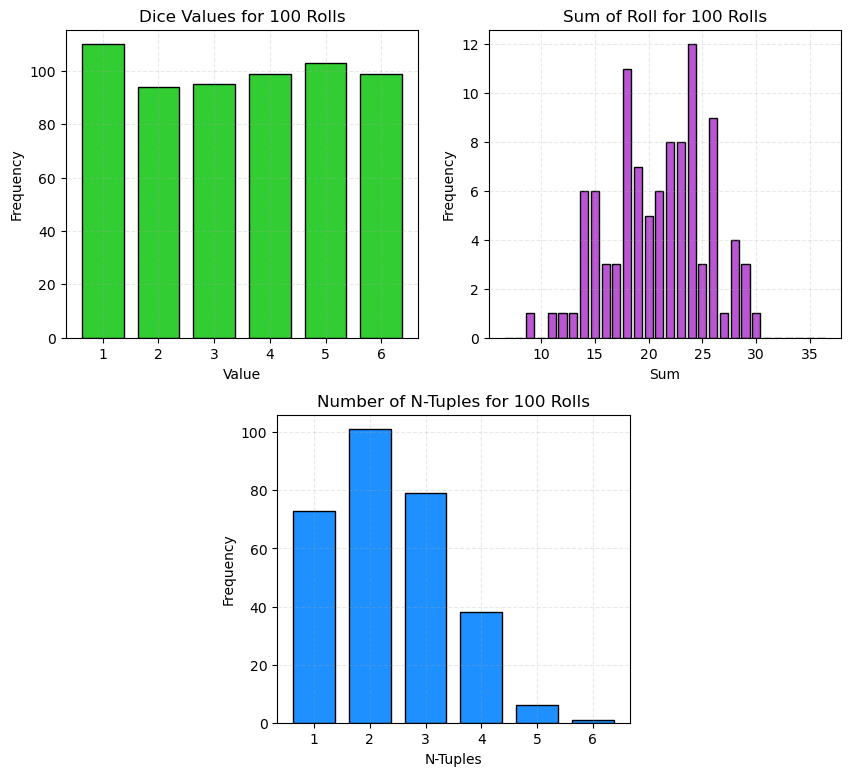

In [3]:
'''Consider 100 rolls of 6 dice with 6 faces'''
sys1 = Part1()
sys1.statistics(6, 6, 100, save_fig = True)

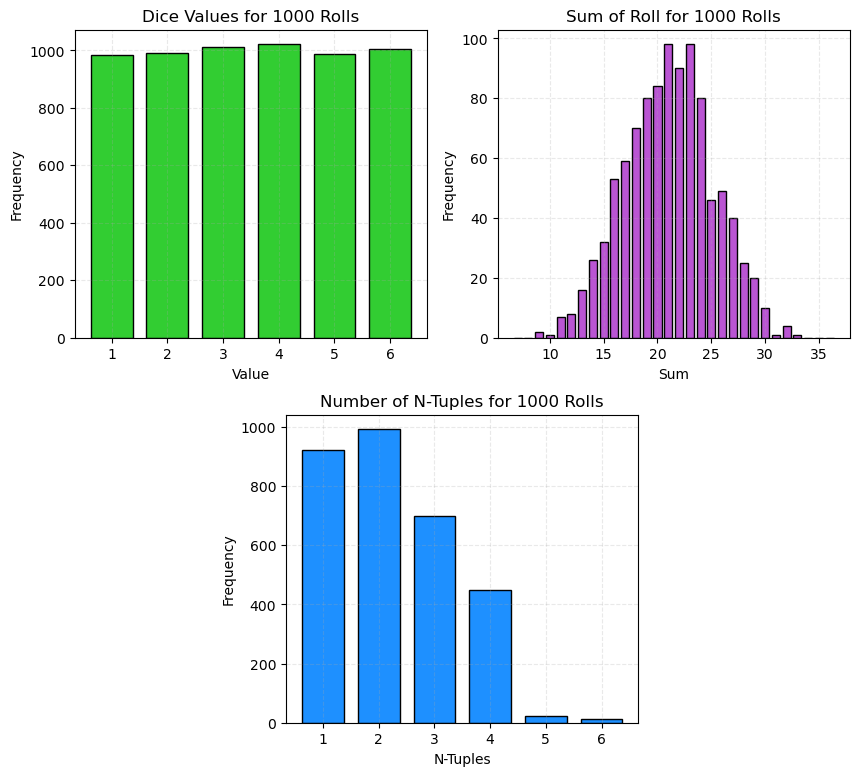

In [4]:
'''Consider 1000 rolls of 6 dice with 6 faces'''
sys2 = Part1()
sys2.statistics(6, 6, 1000, save_fig = True)

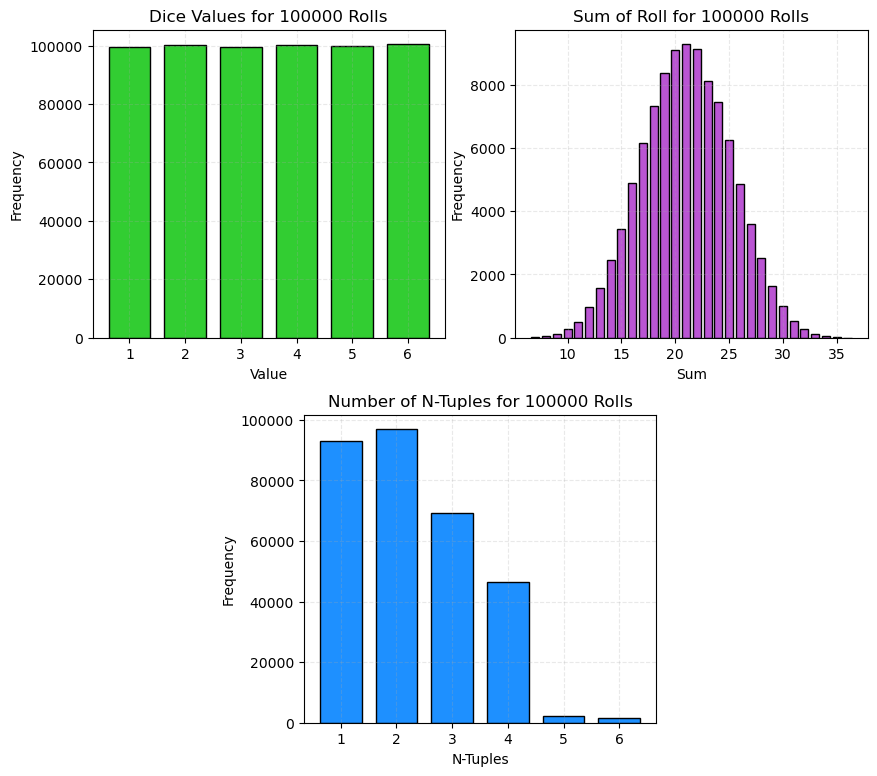

In [5]:
'''Consider 100000 rolls of 6 dice with 6 faces'''
sys1 = Part1()
sys1.statistics(6, 6, 100000, save_fig = True)

#### Part 3: Second Law of Thermodynamics - Equilibrium = Maximum Entropy

##### In this experiment, students repeatedly roll two thirty-sided dice to change the distribution of the energy packets shared between particles.  The particles each begin with one energy packet each.  As more moves are conducted, the distribution of the energy packets become more random and the entropy increases.  The students create a plot of the entropy as they conduct rolls to show that the entropy approaches a maximum as the system becomes more and more random.

In [6]:
class Part3():
    
    '''Internal function to initialize the system'''
    def __init__(self):
        
        '''Initial conditions'''
        self.num_particles = 0
        self.num_dice = 0
        self.num_moves = 0
        
        '''Relevant data'''
        self.move_list = []            #list of the moves conducted
        self.roll_list = []            #list of the dice values each roll [subtract, add]
        self.entropy_list = []         #list of the calculated pseudo-entropy: S / kB = ln(W)
        self.energy_distribution = []  #list of the energy packets contained by each particle
        self.grid_shape = ()           #shape of the of the particles and energy packets
        self.grid = pd.DataFrame()     #empty grid of the particles and energy packets
        self.table = pd.DataFrame(columns = ['N0', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'S / kB'])  #table of relevant data
        
        
    '''Internal function to roll a given number of dice with a given number of faces'''
    def roll_dice(self, num_faces: int, num_dice: int):
        
        '''Return random integer(s) in [1, num_faces]'''
        return np.random.randint(1, num_faces + 1, size = num_dice)
        
        
    '''Internal function to calculate the factorial of a given number'''
    def factorial(self, N: int):
        
        '''Allow only positive integers'''
        if N < 0:
            raise ValueError('Cannot compute the factorial of a negative number!')

        '''0! = 1 // N! = N * (N-1) * (N-2) * ... * 1'''
        if N == 0:
            return 1
        else:
            return N * self.factorial(N - 1)
        
        
    '''Internal function to calculate the pseudo-entropy of the system'''
    def entropy(self, multiplicity: list):
        
        '''Calculate numerator'''
        W = self.factorial(self.num_particles)
        
        '''Calculate number of microstates of the system'''
        for Ni in multiplicity:
            W /= self.factorial(Ni)  #W = M! / (N0! * N1! * N2! * ... * N30!)
        
        '''Return pseudo-entropy S / kB = ln(W)'''
        return np.log(W)
        
        
    '''Internal function to set the initial data given by the user'''
    def _set_data(self, num_particles: int, num_dice: int, num_moves: int, grid_shape: tuple):
        
        '''Set initial conditions'''
        self.num_particles = num_particles
        self.num_dice = num_dice
        self.num_moves = num_moves
        
        '''Set grid shape and table'''
        self.move_list = [move for move in range(num_moves + 1)]
        self.grid_shape = grid_shape
        self.table.columns.name = 'Move'
        
        
    '''Internal function to append and update the relevant data'''
    def _append(self, particle_list: list):
        
        '''Calculate multiplicity; number of particles with _ energy packets'''
        multiplicity = [Counter(particle_list)[num] for num in range(self.num_particles + 1)]
        
        '''Append energy distribution'''
        self.energy_distribution.append(particle_list.copy())
        
        '''Append pseudo-entropy'''
        S_kB = self.entropy(multiplicity)
        self.entropy_list.append(S_kB)
        
        '''Update table'''
        row = [multiplicity[i] for i in range(7)]
        row.append(round(S_kB, 2))
        self.table = pd.concat([self.table, pd.DataFrame([row], columns = self.table.columns)], ignore_index = True)
        
        
    '''Internal function to display the table and grid side-by-side'''
    def side_by_side(self, dataframes: list):
        
        html = '<div style="display:flex">'
        for df in dataframes:
            html += '<div style="margin-left: 96px">'
            html += df.to_html()
            html += '</div>'
        html += '</div>'
        display(HTML(html))
        
        
    '''Function called by the user to randomize the system by rolling dice to change the energy packet distribution'''
    def randomize_system(self, num_particles: int, num_dice: int, num_moves: int, grid_shape: tuple, save_fig = True):
        
        '''Initialize data given by the user'''
        self._set_data(num_particles, num_dice, num_moves, grid_shape)
        particle_list = [1] * num_particles  #each particle has 1 packet of energy at the start
        
        '''Append data for initial system'''
        self._append(particle_list)
        
        '''Randomize system for given number of moves'''
        for move in self.move_list[1:]:
            
            '''Roll dice to change distribution of energy packets'''
            roll = self.roll_dice(num_particles, num_dice)
            subtract, add = roll[0] - 1, roll[1] - 1  #particles to take / give energy packet 
            self.roll_list.append([subtract, add])    #store roll
            
            '''Skip turn // shift energy packets'''
            if particle_list[subtract] == 0 or subtract == add:
                pass
            else:
                particle_list[subtract] -= 1
                particle_list[add] += 1
            
            '''Append data for current system'''
            self._append(particle_list)
            
        '''Set final grid'''
        self.grid = pd.DataFrame(data = np.reshape(particle_list, grid_shape))
        
        '''Print head / tail of table and final grid'''
        df1 = pd.concat([self.table.head(grid_shape[0] // 2), self.table.tail(grid_shape[0] // 2)])
        df2 = self.grid
        self.side_by_side([df1, df2])
        
        '''Plot pseudo-entropy'''
        fig, ax = plt.subplots(1, 1, figsize = (7, 4))
        fig.tight_layout(pad = 3.0)
        ax.set_xlabel('Moves')
        ax.set_ylabel('$S\ /\ k_B$')
        ax.set_title(f'Pseudo-Entropy of Randomized System with {num_particles} Particles')
        ax.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
        ax.plot(self.move_list, self.entropy_list, linestyle = 'solid', color = 'red')
        
        '''Save figure'''
        if save_fig:
            fig.savefig(f'c:/Users/Tucker Knaak/Downloads/{self.num_particles}Particles_{self.num_moves}Moves.png')
            
            
    '''Interal function to update the randomization of the system for the animation'''
    def update(self, move: int, fig, ax1 ,ax2, line,):
        
        '''Set pseudo-entropy data'''
        #ax1.set_
        line.set_data(self.move_list[ : move + 1], self.entropy_list[ : move + 1])
        
        '''Set grid data'''
        ax2.set_title(f'Move: {move}')
        grid = pd.DataFrame(data = np.reshape(self.energy_distribution[move], self.grid_shape))
        table = ax2.table(cellText = grid.values, loc = 'center', cellLoc = 'center')
        table.scale(0.75, 2.5)
        
        '''Show energy distribution change'''
        if move > 0:
            subtract, add = self.roll_list[move - 1]
            
            '''Find subtract and add cells'''
            subtract_cell = (subtract // self.grid_shape[1], subtract % self.grid_shape[1])
            add_cell = (add // self.grid_shape[1], add % self.grid_shape[1])

            '''No change // subtract --> red, add --> green'''
            if subtract == add:
                for cell in table.get_celld().values():
                    cell.set_facecolor('white')
            else:
                table.get_celld()[subtract_cell].set_facecolor('red')
                table.get_celld()[add_cell].set_facecolor('limegreen')
        
        '''Return artist elements'''
        return line,
        
        
    '''Function called by the user to animate the randomization of the system'''
    def animate(self, num_moves: int, save_animation = False):
        
        '''Create figure'''
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6), gridspec_kw = {'width_ratios': [1.5, 1]})
        fig.tight_layout(pad = 3)
        
        '''First figure --> Plot of pseudo-entropy'''
        ax1.set_xlabel('Moves')
        ax1.set_ylabel('$S\ /\ k_B$')
        ax1.set_title(f'Pseudo-Entropy of Randomized System with {self.num_particles} Particles')
        ax1.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
        line, = ax1.plot(self.move_list, self.entropy_list, linestyle = 'solid', color = 'red')
        
        '''Second figure --> table of energy distribution'''
        ax2.axis('off')
        ax2.set_title('Move: 0')
        grid = pd.DataFrame(data = np.reshape(self.energy_distribution[0], self.grid_shape))
        table = ax2.table(cellText = grid.values, loc = 'center', cellLoc = 'center')
        table.scale(0.75, 2.5)
        
        '''Create animation'''
        ani = animation.FuncAnimation(fig, self.update, interval = 250, frames = num_moves + 1,
                                      fargs = (fig, ax1, ax2, line,), blit = False, repeat = False)
        html = HTML(ani.to_jshtml())
        display(html)
        plt.close()
        
        '''Save animation'''
        if save_animation:
            file = f'c:/Users/Tucker Knaak/Downloads/{self.num_particles}Particles_{self.num_moves}Moves.gif'
            writergif = animation.PillowWriter(fps = 5)
            ani.save(file, writer = writergif)

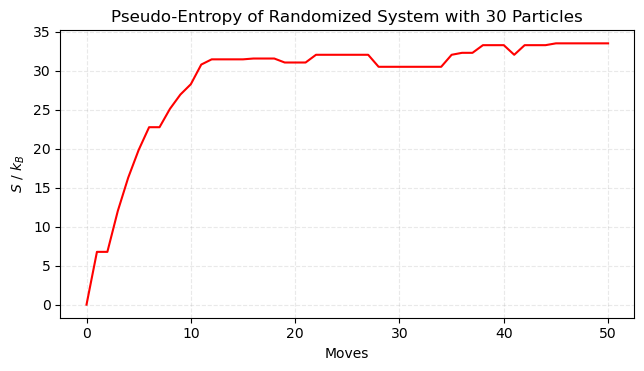

In [7]:
'''Consider 30 particles and 2 dice with 30 faces for 50 moves'''
sys1 = Part3()
sys1.randomize_system(30, 2, 50, (6, 5), save_fig = True)

In [8]:
sys1.animate(50, save_animation = True)

Move,N0,N1,N2,N3,N4,N5,N6,S / kB
0,0,60,0,0,0,0,0,0.00
1,1,58,1,0,0,0,0,8.17
2,2,56,2,0,0,0,0,14.89
3,3,54,3,0,0,0,0,20.72
4,3,54,3,0,0,0,0,20.72
96,21,22,13,4,0,0,0,69.05
97,21,22,13,4,0,0,0,69.05
98,21,22,13,4,0,0,0,69.05
99,22,21,12,5,0,0,0,70.00
100,22,21,12,5,0,0,0,70.00


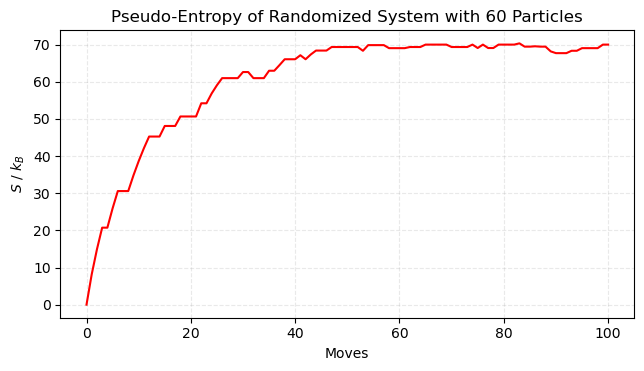

In [10]:
'''Consider 60 particles and 2 dice with 30 faces for 100 moves'''
sys2 = Part3()
sys2.randomize_system(60, 2, 100, (10, 6), save_fig = True)

Move,N0,N1,N2,N3,N4,N5,N6,S / kB
0,0,100,0,0,0,0,0,0.00
1,1,98,1,0,0,0,0,9.20
2,2,96,2,0,0,0,0,16.97
3,3,94,3,0,0,0,0,23.89
4,4,92,4,0,0,0,0,30.20
996,47,25,19,3,3,2,1,125.32
997,46,27,18,3,3,2,1,125.56
998,46,27,18,3,3,2,1,125.56
999,47,25,19,3,3,2,1,125.32
1000,47,25,19,3,3,2,1,125.32


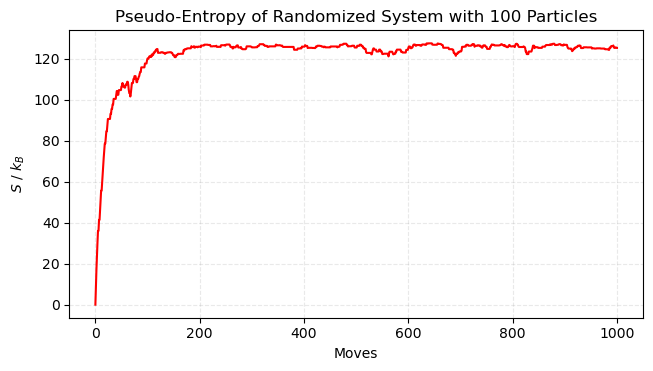

In [11]:
'''Consider 100 particles and 2 dice with 30 faces for 1000 moves'''
sys3 = Part3()
sys3.randomize_system(100, 2, 1000, (10, 10), save_fig = True)